In [1]:
import numpy as np
import math as mh
import matplotlib.pyplot as plt
from sympy import diff
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

Начальные значения:

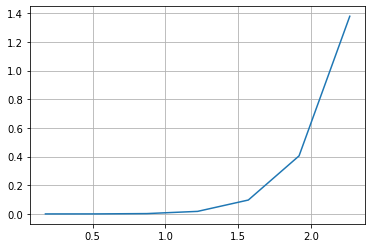

In [5]:
x = [0.17453, 0.52360, 0.87267, 1.22173, 1.5708, 1.91986, 2.26893]
y = [3*10**(-6), 0.00018, 0.00227, 0.01770, 0.09688, 0.40481, 1.37878]

plt.plot(x,y)
plt.grid(True) 
plt.show()

Найдем алгебраический интерполяционный многочлен в форме Ньютона:

In [6]:
def newton_poly(b, x0, a):
    poly = b[0] + b[1]*(x0 - a[0]) + b[2]*(x0 - a[0])*(x0 - a[1]) + b[3]*(x0 - a[0])*(x0 - a[1])*(x0 - a[2])
    poly += b[4]*(x0 - a[0])*(x0 - a[1])*(x0 - a[2])*(x0 - a[3])
    poly += b[5]*(x0 - a[0])*(x0 - a[1])*(x0 - a[2])*(x0 - a[3])*(x0 - a[4])
    poly += b[6]*(x0 - a[0])*(x0 - a[1])*(x0 - a[2])*(x0 - a[3])*(x0 - a[4])*(x0 - a[5])
    return poly

b0 = y
b1 = []
for i in range(1, 7):
    b1.append((y[i] - y[i-1])/(x[i] - x[i-1]))
b2 = []
for i in range(1, 6):
    b2.append((b1[i] - b1[i-1])/(x[i+1] - x[i-1]))
b3 = []
for i in range(1, 5):
    b3.append((b2[i] - b2[i-1])/(x[i+2] - x[i-1]))
b4 = []
for i in range(1, 4):
    b4.append((b3[i] - b3[i-1])/(x[i+3] - x[i-1]))
b5 = []
for i in range(1, 3):
    b5.append((b4[i] - b4[i-1])/(x[i+4] - x[i-1]))
b6 = (b5[1] - b5[0])/(x[6] - x[0])

In [8]:
b = [b0[0], b1[0], b2[0], b3[0], b4[0], b5[0], b6]
x0 = np.array(x)
print('b = ', b)

b =  [3e-06, 0.0005070616208783339, 0.007849824050153706, 0.044778713115431, 0.10939873773923794, 0.12159519358261811, 0.06298552201266759]


Получили интерполяционный многочлен: $P_{N} = b_{0} + b_{1}(x-x_{0}) + b_{2}(x-x_{0})(x-x_{1}) + b_{3}(x-x_{0})(x-x_{1})(x-x_{2}) + b_{4}(x-x_{0})(x-x_{1})(x-x_{2})(x-x_{3}) + b_{5}(x-x_{0})(x-x_{1})(x-x_{2})(x-x_{3})(x-x_{4})$

In [9]:
print('Значение многочлена Ньютона в точках заданных:', newton_poly(b, x0, a=x))
print('Зачения заданных y:', y)

Значение многочлена Ньютона в точках заданных: [3.00000e-06 1.80000e-04 2.27000e-03 1.77000e-02 9.68800e-02 4.04810e-01
 1.37878e+00]
Зачения заданных y: [3e-06, 0.00018, 0.00227, 0.0177, 0.09688, 0.40481, 1.37878]


Заметим, что полученные значения в точности совпадают с заданными.

##### Построение сплайна третьей степени:

In [10]:
X = np.ones(len(x))
for i in range(1, 6+1):
    X = np.vstack((X, np.array(x)**i))
A = np.linalg.inv(X.T) @ y # Коэффициенты перед степенями
#Многочлен 6-ой степени
def poly_6(A, x):
    return A[0] + A[1]*x + A[2]*(x**2) + A[3]*(x**3) + A[4]*(x**4) + A[5]*(x**5) + A[6]*(x**6)
#Производная многочлена Ньютона:
def derirative(A, x):
    return A[1] + 2*A[2]*x + 3*A[3]*(x**2) + 4*A[4]*(x**3) + 5*A[5]*(x**4) + 6*A[6]*(x**5)

In [14]:
#Сплайн третьей степени
def spline(a, x):
    return a[3] + a[2]*x + a[1]*(x**2) + a[0]*(x**3)
def X_arr(x1, x2):
    return np.array([[x1**3, x2**3, 3*(x1**2), 3*(x2**2)], [x1**2, x2**2, 2*x1, 2*x2], 
                     [x1, x2, 1, 1], [1, 1, 0, 0]])
def P(x1, x2, A):
    return np.array([poly_6(A, x1), poly_6(A, x2), derirative(A, x1), derirative(A, x2)])
#Коэффициенты сплайна
def spline_coef(x1, x2, A):
    X_ = X_arr(x1, x2)
    b = P(x1, x2, A)
    return np.linalg.inv(X_.T) @ b

Сплайн между точками 0.5236 и 0.87267 : a3*x^3 + a2*x^2 + a1*x + a0, где:
a1 = -0.0853911561300521
a2 = 0.05462260940995972
a3 = -0.011798894354833613
a0 = 0.04729462069210956


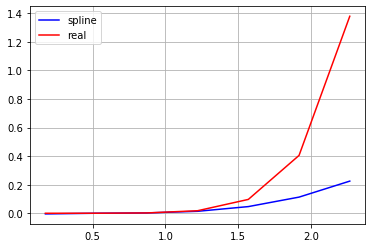

In [24]:
def spline_print(x1, x2, y1, y2,):
    a = spline_coef(x1, x2, A)
    print('Сплайн между точками', x1, 'и', x2, ':', 
          'a3*x^3 + a2*x^2 + a1*x + a0, где:')
    print('a1 =', a[1])
    print('a2 =', a[2])
    print('a3 =', a[3])
    print('a0 =', a[0])
    new_y = spline(a, np.array(x))
    plt.plot(x, new_y, color = 'blue', label='spline')
    plt.plot(x, y,color = 'red', label='real')
    plt.grid(True)
    plt.legend()
spline_print(x[1], x[2], y[1], y[2])

Сплайн между точками 0.17453 и 0.5236 : a3*x^3 + a2*x^2 + a1*x + a0, где:
a1 = 0.1305847159148666
a2 = -0.051667114029957446
a3 = 0.0055662089361988385
a0 = -0.0984615546092235
Сплайн между точками 0.5236 и 0.87267 : a3*x^3 + a2*x^2 + a1*x + a0, где:
a1 = -0.0853911561300521
a2 = 0.05462260940995972
a3 = -0.011798894354833613
a0 = 0.04729462069210956
Сплайн между точками 0.87267 и 1.22173 : a3*x^3 + a2*x^2 + a1*x + a0, где:
a1 = -0.4105928768182565
a2 = 0.3466761657483237
a3 = -0.09915703807022669
a0 = 0.16789644379654445
Сплайн между точками 1.22173 и 1.5708 : a3*x^3 + a2*x^2 + a1*x + a0, где:
a1 = -1.9706049778535828
a2 = 2.2915758196558187
a3 = -0.9070812731084672
a0 = 0.5848193199339184
Сплайн между точками 1.5708 и 1.91986 : a3*x^3 + a2*x^2 + a1*x + a0, где:
a1 = -6.900926095175606
a2 = 10.121490907750939
a3 = -5.051522805315223
a0 = 1.619530959421967
Сплайн между точками 1.91986 и 2.26893 : a3*x^3 + a2*x^2 + a1*x + a0, где:
a1 = -18.346998080650962
a2 = 32.24379949369148
a3 = -19

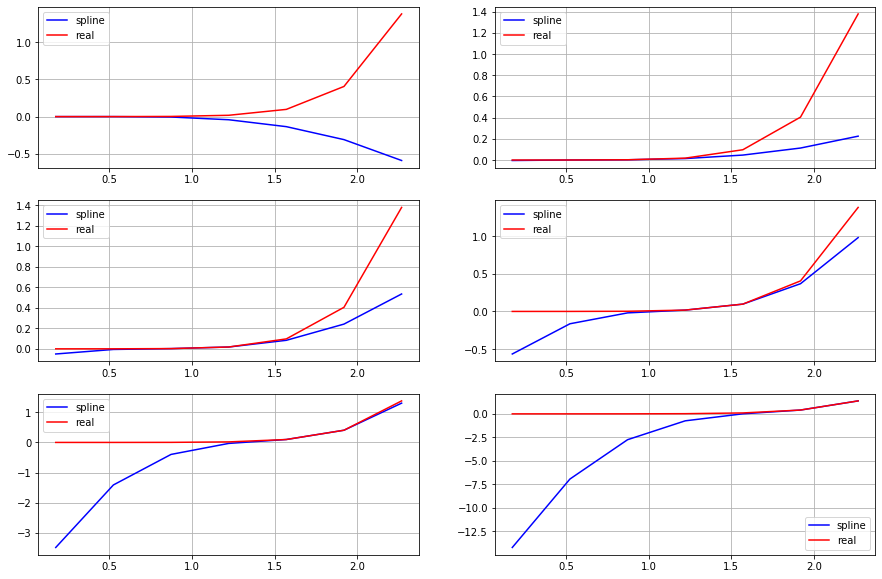

In [25]:
plt.figure(figsize=(15, 35))
plot_number = 0
for i in range(1, len(x)):
    plot_number += 1
    plt.subplot(10, 2, plot_number)
    spline_print(x[i-1], x[i], y[i-1], y[i])

In [28]:
print('Коэффициенты многочлена Ньютона:', A)

Коэффициенты многочлена Ньютона: [ 0.0076168  -0.08455321  0.31942616 -0.57413879  0.54775788 -0.27415481
  0.06298552]
